In [9]:
!pip install scikit-learn

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

## Loading and Visualizing Dataset

In [4]:
data = pd.read_csv('international-airline-passengers.csv', skipfooter = 5,engine='python')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Now lets checkout the data

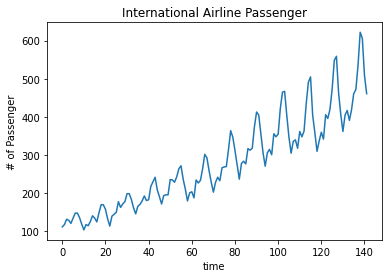

In [5]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('# of Passenger')
plt.title('International Airline Passenger')
plt.show()

### We can see an upward trend in the plot.

# Preprocessing Data

### We need to preprocess our data 
1. It's best to normalize data before moving forward for that we will use MinMax scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2. Reshape our data

In [11]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

3. Scalling and Spliting Test-Train Dataset

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

In [13]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("Train size : {}".format(len(train)))
print("Test size : {}".format(len(test)))

Train size : 71
Test size : 71


Creating Dataset

In [14]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train) - time_stemp - 1):
    a = train[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(train[i+time_stemp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [15]:
dataX = []
dataY = []
for i in range(len(train) - time_stemp - 1):
    a = test[i:(i+time_stemp),0]
    dataX.append(a)
    dataY.append(test[i+time_stemp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [17]:
print("TrainX shape",trainX.shape)

TrainX shape (60, 1, 10)


# Implementing LSTM Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [19]:
# We will use simple LSTM for this data
model = Sequential()
model.add(LSTM(10,input_shape=(1,time_stemp))) #10LSTM neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs = 50, batch_size = 1)

Epoch 1/50
60/60 [==============================] - 1s 9ms/step - loss: 0.0239
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/50
60/60 [==============================

## Predictions and Visualising RNN Model

In [20]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY= scaler.inverse_transform([testY])
train_score = math.sqrt(mean_squared_error(trainY[0],train_predict[:,0]))
print('Train Score %.2f RMSE' %(train_score))
test_score = math.sqrt(mean_squared_error(testY[0],test_predict[:,0]))
print('Test Score %.2f RMSE' %(test_score))

Train Score 19.43 RMSE
Test Score 57.45 RMSE


## Now lets plot our prediction and compare with its true value

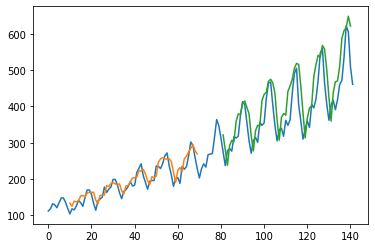

In [21]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:,:] = np.nan
train_predict_plot[time_stemp:len(train_predict) +time_stemp,:]=train_predict
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(time_stemp*2)+1:len(dataset) -1,:] = test_predict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()
